# Movie Industry

**Data Visualization Professors:** Qiwei Han, Íñigo Rituerto de Troya

**Project by:** *Group 7*<br>
40755 | Alessandro Gambetti  <br>
29712 | Édi Ferreira  <br>
26068 | Mónica Pereira <br>
23813 | Tomás Portas <br>

**Peer Evaluation:** Equally distributed points among the group members

**Intro**<br>
The report will consist on the study of rating datasets collected by GroupLens Research from the MovieLens web site and a TMDB dataset.<br>
It is mostly focused on the financial perspective over the data and, therefore, the **analysis performed was based on the point of view of an investor in the Entertainment Industry**.  <br>
To do so, the group did a brainstorming session on the possible categories that might influence the profits realized in the industry, and came up with different ideas based on the data we had and started doing some exploratory analysis. <br>
The ultimate goal was to come up with some real recommendations on characteristics that give investors higher chances of having positive returns on the industry. Therefore, the hypothesis that were tested were:<br>
- There are genres more profitable than others<br>
- The rating of a movie impacts its profits as more people go to the cinema<br>
- The profitability of a movie is affected by macroeconomic factors (as recessions)<br>
- The duration of a movie (runtime) affects its revenues<br>
- There are certain actors that, on average, attract more people to go the movie theathers<br>
- There are production companies that are more likely to produce profitable movies than others<br>
<br>

**Contents** <br>
0. Data Import<br>
1. Data Curation<br>
2. Budget, Revenue and Profitability Index by Genre<br>
3. Ratings and Profits
4. Movie Characteristics<br>
5. Companies<br>
6. Actors<br>
7. Conclusions<br>
8. Sources<br>
<br>



# *0. Data Import*
* Firstly, the group did all the data imports necessary for the project, accompanied by some first insights regarding the utility of the columns from each dataset, regarding relevance or duplication of information:



In [1]:
# Mount the google drive:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import libraries:

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [0]:
# Import datasets:

genome_scores = pd.read_csv('/content/drive/My Drive/Project/genome-scores.csv')
genome_tags = pd.read_csv('/content/drive/My Drive/Project/genome-tags.csv')
links = pd.read_csv('/content/drive/My Drive/Project/links.csv')
movies = pd.read_csv('/content/drive/My Drive/Project/movies.csv')
ratings = pd.read_csv('/content/drive/My Drive/Project/ratings.csv')
tags = pd.read_csv('/content/drive/My Drive/Project/tags.csv')
tmdb_credits = pd.read_csv('/content/drive/My Drive/Project/tmdb_5000_credits.csv')
tmdb_movies = pd.read_csv('/content/drive/My Drive/Project/tmdb_5000_movies.csv')

* Then, the datasets were opened in order to have a brief idea on what they contain, being able to decide if they would be relevant or not for further analysis


In [0]:
genome_scores.head(3) # useless, related with tags

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775


In [0]:
genome_tags.head(3) # useless, related with tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century


In [0]:
links.head(3) # USEFUL, but drop 'imdbId'

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [0]:
movies.head(3) # USEFUL, starting point

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [0]:
ratings.head(3) # useless, since it is about ratings given by individual userID's

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819


In [0]:
tags.head(3) # useless, related with tags that are too dispersed in terms of different words to 

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079


In [0]:
tmdb_credits.head(3) # USEFUL, but drop 'crew'+'title' since the merge will be by movieID

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [0]:
tmdb_movies.head(2) # USEFUL, but drop a lot of categories (many already present in others)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


* After the first impressions displayed on the previous comments, the **team realized that the values in the dataset were not adjusted for inflation** over the years. Therefore, it was imported the inflation for USD and the index base 2015 (date of the last movie):


In [4]:
inflation = pd.read_csv('/content/drive/My Drive/Project/Inflation_US.csv', sep=";")
inflation.head(3)

,YEAR,Annual Inflation,inflation_base2015
0,1914,1%,0.041
1,1915,1%,0.042
2,1916,7.9%,0.042


# *1. Data Curation*
* In order to create a new and unique Master Dataframe with all the information necessary to draw conclusions, the next step is to drop columns and merging information according to the former insights:


In [0]:
# Drop useless columns:

links.drop(columns='imdbId', inplace=True)
tmdb_credits.drop(columns=['title','crew'], inplace=True)
tmdb_movies.drop(columns=['genres','homepage','keywords','original_title','overview','spoken_languages','status','tagline','title'], inplace=True)

# Merge useful datasets and respective columns:

master_df = pd.merge(movies, links, on='movieId')
master_df = pd.merge(master_df, tmdb_credits, left_on='tmdbId', right_on='movie_id')
master_df = pd.merge(master_df, tmdb_movies, left_on='tmdbId', right_on='id')

# Add column with the year of release (to work with inflation)

master_df['year'] = pd.DatetimeIndex(master_df['release_date']).year

master_df = pd.merge(master_df, inflation, left_on='year', right_on='YEAR')
master_df.drop(columns=['movie_id','id','YEAR'], inplace=True)

In [6]:
master_df.head(2)

,movieId,title,genres,tmdbId,cast,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,year,Annual Inflation,inflation_base2015
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,862.0,"[{""cast_id"": 14, ""character"": ""Woody (voice)"",...",30000000,en,73.640445,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-10-30,373554033,81.0,7.7,5269,1995,2.8%,0.625
1,10,GoldenEye (1995),Action|Adventure|Thriller,710.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",58000000,en,59.824565,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1995-11-16,352194034,130.0,6.6,1174,1995,2.8%,0.625


In [7]:
# To have all values of revenues and budget in millions, divide the values by 1000000:

one_mln = 1000000
master_df['revenue'] = master_df['revenue'] / one_mln
master_df['budget'] = master_df['budget'] / one_mln
master_df['revenue_adjusted'] = master_df['revenue'] / master_df['inflation_base2015']
master_df['budget_adjusted'] = master_df['budget'] / master_df['inflation_base2015']

master_df.head(2)

,movieId,title,genres,tmdbId,cast,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,year,Annual Inflation,inflation_base2015,revenue_adjusted,budget_adjusted
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,862.0,"[{""cast_id"": 14, ""character"": ""Woody (voice)"",...",30.0,en,73.640445,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-10-30,373.554033,81.0,7.7,5269,1995,2.8%,0.625,597.686453,48.0
1,10,GoldenEye (1995),Action|Adventure|Thriller,710.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",58.0,en,59.824565,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1995-11-16,352.194034,130.0,6.6,1174,1995,2.8%,0.625,563.510454,92.8


* Once owning all the monetary variables well curated, it was crucial for the analysis to have a measure of profitability to differentiate between movies. Since **budget and revenues were the available categories, the most plausible comparison parameter would be a Profitability Index (PI)**. Revenues divided by budget was considered a better profitability measure rather than the difference between revenues and budget, because the ratio is not influenced by the size of the variables:

In [0]:
# Add a profitability index column:

master_df['profitability_index'] = master_df['revenue'] / master_df['budget']

In [0]:
# Remove outliers based on the profitability index

IQR_PI = np.nanpercentile(master_df['profitability_index'], 75) - np.nanpercentile(master_df['profitability_index'], 25)
outliers_PI = np.nanpercentile(master_df['profitability_index'], 75) + 1.5 * IQR_PI

master_df = master_df.loc[master_df['profitability_index'] <= outliers_PI]

In [0]:
# Re-order columns for a better overview:

master_df = master_df[['movieId', 'tmdbId', 'title', 'genres', 'original_language', 'release_date', 'runtime', 
                      'cast', 'production_companies', 'production_countries', 'popularity', 'vote_average', 
                      'vote_count', 'revenue', 'budget', 'revenue_adjusted', 'budget_adjusted', 'profitability_index']]

* Finally, an **overview** of the Final Master DataFrame:

In [11]:
master_df.head(3)

,movieId,tmdbId,title,genres,original_language,release_date,runtime,cast,production_companies,production_countries,popularity,vote_average,vote_count,revenue,budget,revenue_adjusted,budget_adjusted,profitability_index
1,10,710.0,GoldenEye (1995),Action|Adventure|Thriller,en,1995-11-16,130.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",59.824565,6.6,1174,352.194034,58.0,563.510454,92.8,6.072311
2,11,9087.0,"American President, The (1995)",Comedy|Drama|Romance,en,1995-11-17,106.0,"[{""cast_id"": 1, ""character"": ""Andrew Shepherd""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11.056763,6.5,195,107.879496,62.0,172.607194,99.2,1.739992
3,14,10858.0,Nixon (1995),Drama,en,1995-12-22,192.0,"[{""cast_id"": 1, ""character"": ""Richard Nixon"", ...","[{""name"": ""Hollywood Pictures"", ""id"": 915}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3.770161,7.1,71,13.681765,44.0,21.890824,70.4,0.310949


In [0]:
master_df.describe()

,movieId,tmdbId,runtime,popularity,vote_average,vote_count,revenue,budget,revenue_adjusted,budget_adjusted,profitability_index
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,41385.717860,33373.972161,109.586800,24.280372,6.230091,801.680638,96.484963,39.289397,126.885730,51.885492,2.299269
std,40262.588847,52404.237699,20.225459,27.990866,0.877005,1262.544945,160.423896,42.248405,196.734802,54.766585,2.251017
min,10.000000,5.000000,47.000000,0.010909,0.000000,0.000000,0.000000,0.000001,0.000000,0.000001,0.000000
25%,3837.000000,7303.000000,96.000000,8.282876,5.700000,120.000000,7.000000,10.500000,10.474827,15.806112,0.506976
50%,33145.000000,11495.000000,106.000000,17.047276,6.300000,351.000000,38.058335,25.000000,55.116402,35.211268,1.727359
75%,78019.000000,37834.000000,120.000000,31.957947,6.800000,895.000000,115.267375,53.000000,156.976744,72.000000,3.381336
max,131013.000000,302579.000000,338.000000,724.247784,8.500000,13752.000000,1845.034188,380.000000,2787.060707,1251.621622,10.047674


# *2. Budget, Revenue and Profitability Index by Genre*

* As an investor in the Entertainment Industry, one of the first questions that comes to mind is what would be the **most profitable genres to invest in**. In order to reach some results, it was firstly defined the average revenue and budget to be able to compare, between categories, what are the types of movies that require more inputs and the ones that return the major share in the sector. Furthermore, as a different but related analysis, the average PI for each genre is also imperative in terms of business insights:

In [0]:
# "Binarizing all the data"
from sklearn.preprocessing import MultiLabelBinarizer

genres = master_df[['title', 'genres', 'budget_adjusted', 'revenue_adjusted', 'profitability_index']]
genres['genres'] = genres['genres'].apply(lambda x: x.split('|')) #splitting each genre

s = genres['genres'] #category to binarize 

mlb = MultiLabelBinarizer() #init the binarizer 
dummies = pd.DataFrame(mlb.fit_transform(s), columns = mlb.classes_, index = genres.index) #getting dummies 

genres = pd.concat([genres, dummies], axis = 1) #concatenate movies and dummies 
genres.head()

,title,genres,budget_adjusted,revenue_adjusted,profitability_index,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,GoldenEye (1995),"[Action, Adventure, Thriller]",92.8,563.510454,6.072311,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,"American President, The (1995)","[Comedy, Drama, Romance]",99.2,172.607194,1.739992,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,Nixon (1995),[Drama],70.4,21.890824,0.310949,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Cutthroat Island (1995),"[Action, Adventure, Romance]",156.8,16.027715,0.102218,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,Casino (1995),"[Crime, Drama]",83.2,185.779800,2.232930,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Compute average revenue per category and store it into a dictionary:

categories = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']

# Store the sum/average in a dictionary, each key is a category (just working for sums):
average_revenues = {}
average_budgets = {}


for category in categories:
    temp_rule = genres[category] == 1 #selection rule 
    temp_df = genres[temp_rule] #selected dataframe 
    av_revenue = temp_df['revenue_adjusted'].mean() 
    av_budget = temp_df['budget_adjusted'].mean() 

    
    average_revenues[category] = av_revenue #storing in the dictionary 
    average_budgets[category] = av_budget 

In [0]:
# Sorting by values:

average_revenues = sorted(average_revenues.items(), key=lambda x:x[1], reverse=False)
average_revenues = dict(average_revenues)

average_budgets = sorted(average_budgets.items(), key=lambda x:x[1], reverse=False)
average_budgets = dict(average_budgets)

# Sorting average budget and computing the profitability index by each key according to the order of revenues:

average_budgets_sorted = {}

average_profitability_index = {}

keys_revenue = list(average_revenues.keys())

for key in keys_revenue:
    average_budgets_sorted[key] = average_budgets[key]
    average_profitability_index[key] = average_revenues[key] / average_budgets[key]

print(average_profitability_index)   
print('\n')
print(average_budgets_sorted)

{'Documentary': 2.050472914859219, 'Film-Noir': 1.7346191779981088, 'Horror': 2.315303926260271, 'Western': 1.4702364308896974, 'Drama': 2.172698388532508, 'Crime': 2.2884841555006132, 'Romance': 2.5624406238369386, 'Mystery': 2.4809304203382094, 'Comedy': 2.5338887029284063, 'Thriller': 2.405997108456509, 'Musical': 2.647631393409335, 'War': 2.041193222783916, 'Action': 2.5169313056408518, 'Sci-Fi': 2.5569919579392475, 'Fantasy': 2.6121891513472577, 'Children': 2.7262622417797395, 'Adventure': 2.909068643729135, 'Animation': 3.0836135584415283}


{'Documentary': 8.661520542663673, 'Film-Noir': 31.96020106998976, 'Horror': 31.936968279837043, 'Western': 55.67875824141617, 'Drama': 42.4444574625157, 'Crime': 45.51812419539213, 'Romance': 44.619260201301856, 'Mystery': 46.223023728046456, 'Comedy': 47.06104870283919, 'Thriller': 55.066902030969565, 'Musical': 51.7115562650297, 'War': 67.26643273699123, 'Action': 80.07527535560385, 'Sci-Fi': 84.0782832194763, 'Fantasy': 86.96506007110283,

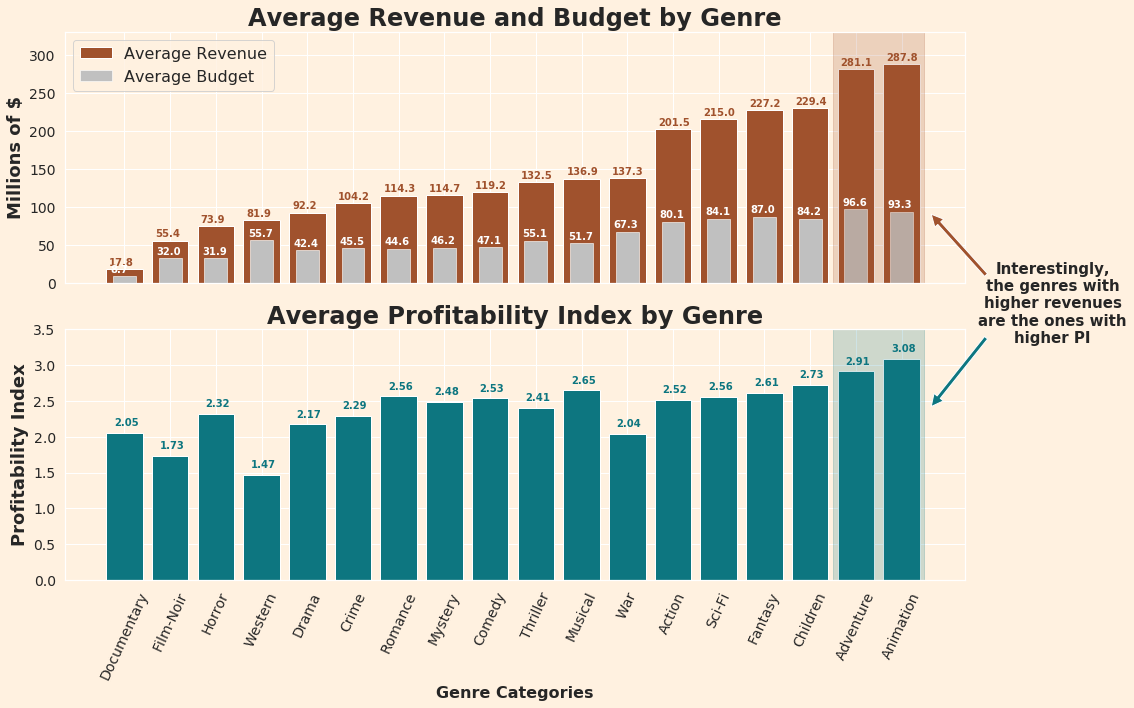

In [0]:
# Final Graph = Revenue, Budget and Profitability index by Genre
 
color = 'FFF1E0'
sns.set(rc={'axes.facecolor':color, 'figure.facecolor':color}) #same as before in scatter 

fig, ax = plt.subplots(2, 1, figsize = (14, 10), sharex = True)
plt.xlabel('Genre Categories', fontsize = 16, fontweight = 'bold') 
ax[0].set_title('Average Revenue and Budget by Genre', fontsize = 24, fontweight = 'bold')
ax[0].bar(range(len(average_revenues)), list(average_revenues.values()), align='center', color = 'sienna', lw = 1, label = 'Average Revenue', width = 0.8,)
ax[0].bar(range(len(average_budgets_sorted)), list(average_budgets_sorted.values()), align='center', color = 'silver', lw = 0.6, label = 'Average Budget', width = 0.5)
plt.xticks(range(len(average_revenues)), list(average_revenues.keys()), rotation = 65, fontsize = 16)
ax[0].set_ylabel('Millions of $', fontsize = 18,fontweight = 'bold')
ax[0].set_ylim([0,330])
ax[0].legend(fontsize = 16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].axvspan(15.5, 17.5, color='sienna', alpha=0.2)

# Set the text for each barplot:
for i, v in enumerate(average_revenues.values()):
    ax[0].text(i - 0.33, v + 5, str(round(v,1)), color='sienna', fontsize = 10, fontweight = 'bold')

for u, o in enumerate(average_budgets_sorted.values()):
    ax[0].text(u - 0.3, o + 5, str(round(o,1)), color='white', fontsize = 10, fontweight = 'bold')

ax[1].set_title('Average Profitability Index by Genre', fontsize = 24, fontweight = 'bold')
ax[1].bar(range(len(average_profitability_index)), list(average_profitability_index.values()), align='center', color = '#0D7680', lw = 1, label = 'Average Profitability Index')
ax[1].set_ylabel('Profitability Index', fontsize = 18, fontweight = 'bold')
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_ylim([0,3.5])
ax[1].axvspan(15.5, 17.5, color='#0D7680', alpha=0.2)

for p, t in enumerate(average_profitability_index.values()):
    ax[1].text(p - 0.23, t + 0.1, str(round(t,2)), color='#0D7680', fontsize = 10, fontweight = 'bold')

#annotations
fig.text(1.05, 0.57, 'Interestingly,\nthe genres with\nhigher revenues\nare the ones with\nhigher PI', ha='center', va='center', fontsize=15, fontweight='bold')
ax[0].annotate('', xy=(17.5, 100), xytext=(19,0), arrowprops=dict(facecolor='sienna', shrink=0.1))
ax[1].annotate('', xy=(17.5, 2.3), xytext=(19,3.5), arrowprops=dict(facecolor='#0D7680', shrink=0.1))

plt.tight_layout()

**Findings:**

Taking into account the graphs above, it is reasonable to claim that there is a **positive correlation between average revenues and budget in the Movies Industry** (r2=0.65, coefficient is calculated later on), being Animation and Adventure the ones with higher values for both. This can be explained by the fact that, on one hand, these genres imply much more monetary requirements such as proper softwares and hardware-essentials, high-level knowledge in programming and some creativity. On the other hand, these are also the ones that create the largest source of revenue. According to Deadline Hollywood, **these come mainly from "ancillary forms of domestic distribution including the sale of Blu-rays and DVDs, direct-to-consumer film rentals through video-on-demand services, and licensing fees from television broadcasters and streaming services**". <br>

Regarding profitability index, it is also possible to see some clear differences among the different genres.
The **most profitable genres are the Animation, Adventure and Children**. This has to do with the fact that these movies are the ones that people see the most, and are among their preferences.
On the other hand, **Western movies are the ones with lower profitability index**. This lower value is mostly explained by the high average budget necessary to produce these movies (e.g. fights, destruction, etc.) 
 

Links:<br>
https://deadline.com/2018/07/film-industry-revenue-2017-ibisworld-report-gloomy-box-office-1202425692/<br>
https://www.latimes.com/entertainment/envelope/cotownla-et-ct-documentaries-big-audiences-the-jinx-20150319-story.html

# *3. Ratings and Profits*

* Before looking at the data we have in hand, and just by thinking about how we analyze how good a movie can be nowadays, we came up with the **hypothesis that the rating given in websites (like IMDB and TMDB) should influence the revenues of a movie and therefore its profits**. To check this hypothesis, it was computed the correlations between the Vote Average, Revenues, Budget and Profitability Index:

In [0]:
# Instanciate a working dataframe for this context: 

votes = master_df[master_df['vote_count'] >= 100] #Exlude all the films with less than 100 votes as a way to assure representativeness of the ratings
relative_cols = ['title','budget_adjusted', 'revenue_adjusted', 'vote_average', 'vote_count', 'profitability_index'] #necessary columns 
votes = votes[relative_cols]
votes.head()

,title,budget_adjusted,revenue_adjusted,vote_average,vote_count,profitability_index
1,GoldenEye (1995),92.8,563.510454,6.6,1174,6.072311
2,"American President, The (1995)",99.2,172.607194,6.5,195,1.739992
4,Cutthroat Island (1995),156.8,16.027715,5.7,136,0.102218
5,Casino (1995),83.2,185.779800,7.8,1307,2.232930
6,Sense and Sensibility (1995),26.4,216.000000,7.2,352,8.181818


In [0]:
# Compute the correlation between rating, revenue and budget:

corr = votes[['vote_average', 'budget_adjusted', 'revenue_adjusted', 'profitability_index']].corr()
corr

,vote_average,budget_adjusted,revenue_adjusted,profitability_index
vote_average,1.000000,-0.012448,0.184669,0.269100
budget_adjusted,-0.012448,1.000000,0.648955,-0.021623
revenue_adjusted,0.184669,0.648955,1.000000,0.477027
profitability_index,0.269100,-0.021623,0.477027,1.000000


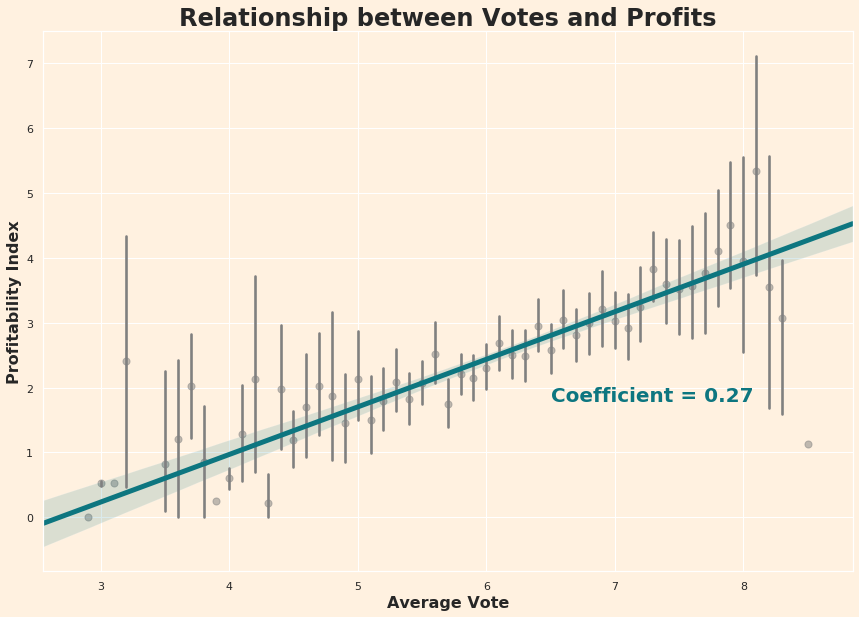

In [0]:
g = sns.regplot(x="vote_average", y="profitability_index", scatter_kws={'color':'gray','alpha':0.5}, line_kws={'color':'#0D7680', 'lw':5}, data=votes, x_estimator=np.mean);

plt.subplots_adjust(top=2, right=2)

plt.xlabel("Average Vote", fontsize = 16, fontweight = 'bold')
plt.ylabel('Profitability Index', fontsize = 16, fontweight = 'bold')
plt.title("Relationship between Votes and Profits", fontsize = 24, fontweight = 'bold');

plt.text(6.5, 1.8, 'Coefficient = 0.27', fontdict={'color':'#0D7680', 'fontsize':20, 'fontweight':'bold'})

plt.show()

**Findings:**

Although is not high, **there is still a positive correlation between the movie´s rating and the profitability index** it generates (Coefficient = 0.27).

It makes perfect sense in the perspective that as a movie has higher evaluations, by experts and common users, it gets more popular and therefore the revenues will increase more, while the budget is kept constant.

However, from an investor point of view, this evaluation can only be used when the movie was already released. Which means that he can not base his evaluation on the rating but can follow up his success as the movie is out and running. This way he can get some insights before the movie gets out of the theatres and stops selling Blu-rays.



# *4. Movie Caracteristics*

*  The group thought it would be interesting to analyse some of the other characteristics available, and try to reach some conclusions out of it. For example, **understand if there is a pattern on the years that have the highest revenues** (is this somehow related to the state of the economy, or any other factor?). Also, for the lenght of the movie, is it something that might have a relation with its success?

In [0]:
# First of all, lets have a look on the dataset we want to use in the beggining

master_df.head(3)

,movieId,tmdbId,title,genres,original_language,release_date,runtime,cast,production_companies,production_countries,popularity,vote_average,vote_count,revenue,budget,revenue_adjusted,budget_adjusted,profitability_index
1,10,710.0,GoldenEye (1995),Action|Adventure|Thriller,en,1995-11-16,130.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",59.824565,6.6,1174,352.194034,58.0,563.510454,92.8,6.072311
2,11,9087.0,"American President, The (1995)",Comedy|Drama|Romance,en,1995-11-17,106.0,"[{""cast_id"": 1, ""character"": ""Andrew Shepherd""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11.056763,6.5,195,107.879496,62.0,172.607194,99.2,1.739992
3,14,10858.0,Nixon (1995),Drama,en,1995-12-22,192.0,"[{""cast_id"": 1, ""character"": ""Richard Nixon"", ...","[{""name"": ""Hollywood Pictures"", ""id"": 915}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3.770161,7.1,71,13.681765,44.0,21.890824,70.4,0.310949


* Let´s try to understand the variation of revenue by each movie year of release:

In [0]:
#sort the dataframe by date of the movies

sorted_dates = master_df.sort_values(by=["release_date"], ascending=True) 

# get the 3 used columns and drop null values

data_dates = sorted_dates[["release_date","revenue_adjusted","profitability_index"]].dropna(how='any') 
data_dates.head(3)

,release_date,revenue_adjusted,profitability_index
1089,1927-01-10,8.789486,0.007022
2608,1930-11-15,111.111111,2.025316
650,1932-12-08,0.000391,6.250000


In [0]:
#create a new column with just the years
years = []
for item in list(data_dates["release_date"]):
  year = item[:4]
  years.append(year)
data_dates["year_release"] = years


data_dates.head()

,release_date,revenue_adjusted,profitability_index,year_release
1089,1927-01-10,8.789486,0.007022,1927
2608,1930-11-15,111.111111,2.025316,1930
650,1932-12-08,0.000391,6.250000,1932
649,1932-12-08,0.000391,6.250000,1932
1981,1933-02-02,40.017544,5.195900,1933


In [0]:
# Group the revenues by year

revenue_by_year = data_dates.groupby('year_release').agg({'revenue_adjusted':'mean', 'profitability_index': 'mean'}).rename(columns={'revenue_adjusted':'avg_revenue', 'profitability_index':'avg_profitability_index'})
revenue_by_year.head(3)

,avg_revenue,avg_profitability_index
year_release,,
1927,8.789486,0.007022
1930,111.111111,2.025316
1932,0.000391,6.250000


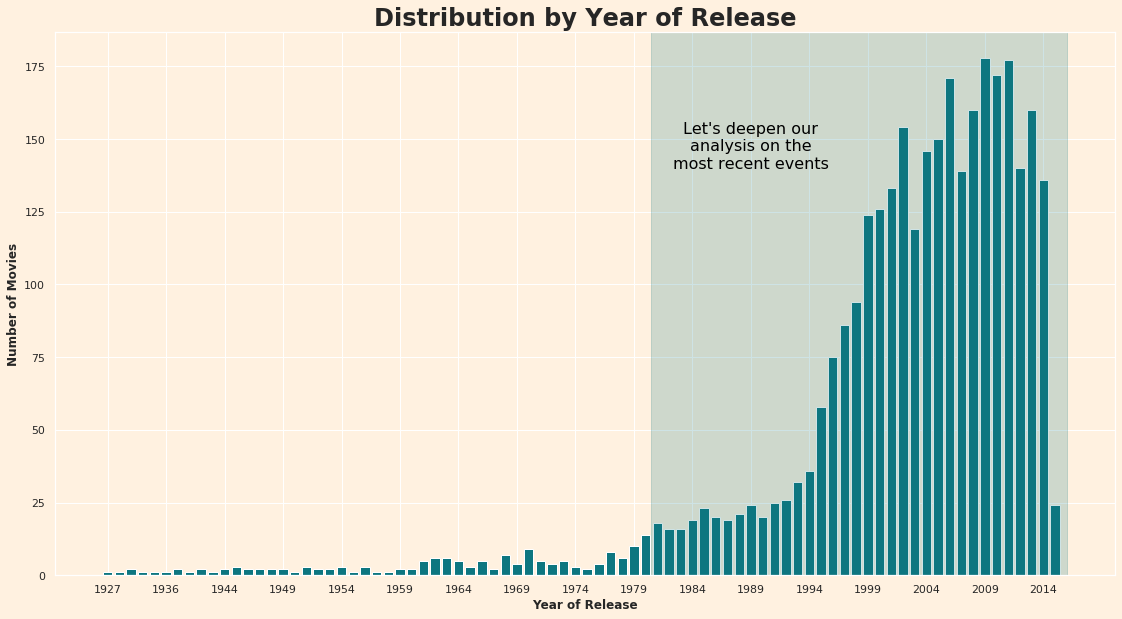

In [0]:
# just a quick look over the data, to understand how many movies we have per year
xx = data_dates.groupby('year_release').agg({'revenue_adjusted':'count'}).rename(columns={'revenue_adjusted':'number_movies'}).reset_index()

fig = plt.figure(figsize=(19, 10))

plt.bar(x=xx['year_release'], height=xx['number_movies'], color = '#0D7680')
plt.title('Distribution by Year of Release', fontsize = 24, fontweight = 'bold')
plt.xlabel('Year of Release', fontweight='bold')
plt.xticks(ticks=xx['year_release'][::5])
plt.ylabel('Number of Movies', fontweight='bold')
plt.axvspan(46.5, 82, color='#0D7680', alpha=0.2)
plt.text(55, 140, 'Let\'s deepen our\nanalysis on the\nmost recent events', fontdict={'color':'black', 'fontsize':16}, ha='center')

plt.show()

In [0]:
xx['year_release'].iloc[46]

'1980'

In [0]:
xx['year_release'].iloc[81]

'2015'

* From last chart, it can be seen that only around the 80´s we start to have relevant data, and therefore that is what will be plot in the next graph


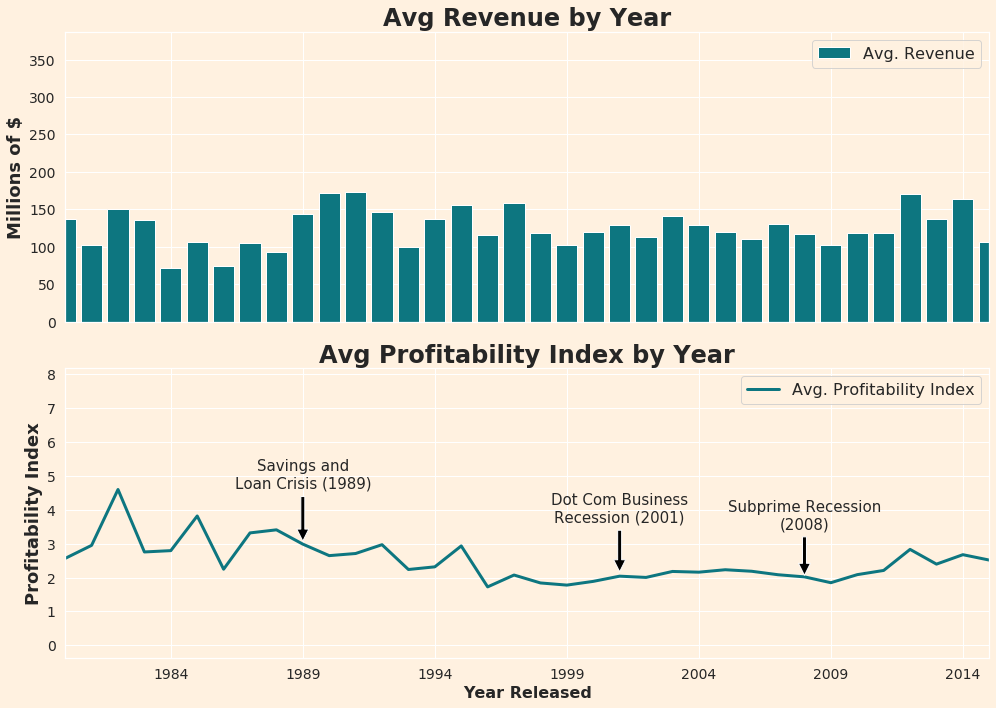

In [0]:
# Final Graph = Revenue and Profitability index by Release Date
 
color = 'FFF1E0'
sns.set(rc={'axes.facecolor':color, 'figure.facecolor':color}) #same as before 
fig, ax = plt.subplots(2, 1, figsize = (14, 10), sharex = True)
plt.xticks(range(len(list(revenue_by_year.index)))[::5], list(revenue_by_year.index)[::5], fontsize = 12)
plt.xlabel('Year Released', fontsize = 16, fontweight = 'bold') 

# Set the first bar plot

ax[0].set_title('Avg Revenue by Year', fontsize = 24, fontweight = 'bold')
ax[0].bar(range(len(list(revenue_by_year.index))), list(revenue_by_year["avg_revenue"]), align='center', color = '#0D7680', lw = 1, label = 'Avg. Revenue', width = 0.8,)
ax[0].set_ylabel('Millions of $', fontsize = 18,fontweight = 'bold')
ax[0].legend(fontsize = 16)
ax[0].set_xlim([46,81])   # set the xlim
#ax[0].annotate('70´s show a slight increase in revenues', xy=(40, 600), xytext=(25,800), fontsize = 16,arrowprops=dict(facecolor='black', shrink=1))
ax[0].tick_params(axis='both', which='major', labelsize=14)


# Set the second line graph:

ax[1].set_title('Avg Profitability Index by Year', fontsize = 24, fontweight = 'bold')
ax[1].plot(range(len(list(revenue_by_year.index))), list(revenue_by_year["avg_profitability_index"]), color = '#0D7680', lw = 3, label = 'Avg. Profitability Index')
ax[1].set_ylabel('Profitability Index', fontsize = 18, fontweight = 'bold')
ax[1].legend(fontsize = 16)
#ax[1].annotate('70´s show a clear increase in PI', xy=(40, 60), xytext=(25,80), fontsize = 16,arrowprops=dict(facecolor='black', shrink=1))
ax[1].set_xlim([46,81])   # set the xlim
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].annotate('Savings and\nLoan Crisis (1989)', xytext=(55,5.5), xy=(55,3), arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', verticalalignment='top', fontsize=15)
ax[1].annotate('Dot Com Business\nRecession (2001)', xytext=(67,4.5), xy=(67,2.1), arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', verticalalignment='top', fontsize=15)
ax[1].annotate('Subprime Recession\n(2008)', xytext=(74,4.3), xy=(74,2), arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', verticalalignment='top', fontsize=15)

plt.tight_layout()

* Now, let´s repeat the same analysis, considering the lenght of each movie, and try to understand if there is any pattern between movie lenght and profits


In [0]:
# sort the dataframe by movie lengh
sorted_dates = master_df.sort_values(by=["runtime"], ascending=True) 

# get the 3 used columns and drop null values

times = sorted_dates[["runtime","revenue_adjusted","profitability_index"]].dropna(how='any') 
times.head(3)

,runtime,revenue_adjusted,profitability_index
2353,47.0,0.000000,0.000000
3515,63.0,15.717391,0.482000
687,69.0,176.327445,6.866735


In [0]:
# Group by movie lenght

movie_lenght = times.groupby('runtime').agg({'revenue_adjusted':'mean', 'profitability_index': 'mean'}).rename(columns={'revenue_adjusted':'avg_revenue', 'profitability_index':'avg_profitability_index'})
movie_lenght.index = movie_lenght.index.map(int)
movie_lenght

,avg_revenue,avg_profitability_index
runtime,,
47,0.000000,0.000000
63,15.717391,0.482000
69,176.327445,6.866735
72,108.467286,4.363045
73,0.000000,0.000000
...,...,...
216,555.518929,4.666359
219,11.386703,0.079189
229,0.000000,0.000000


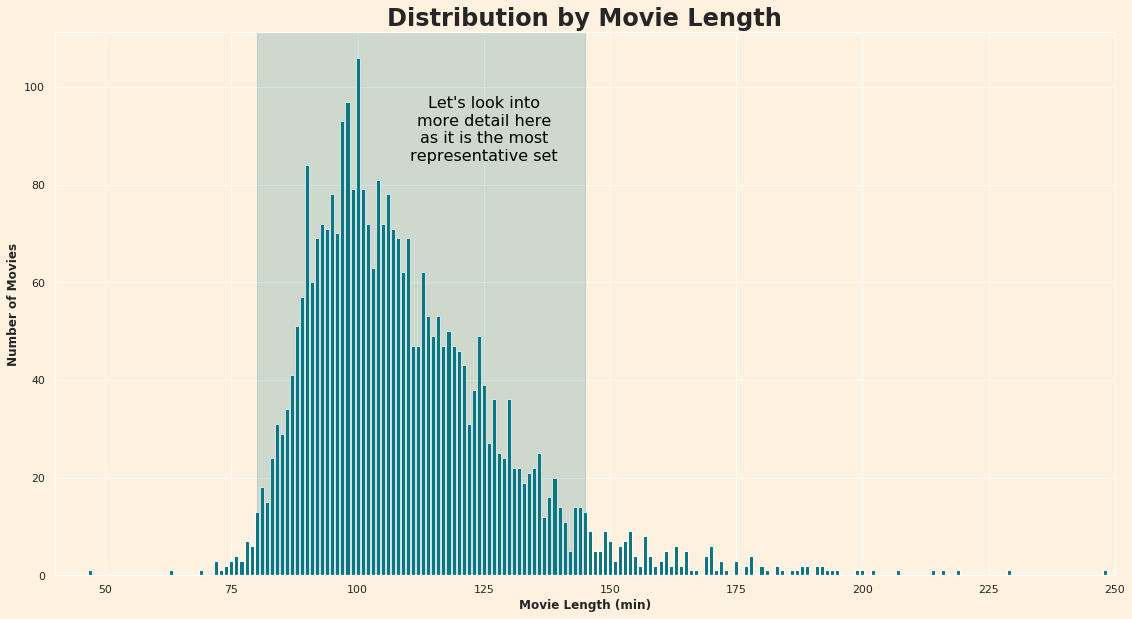

In [0]:
# just a quick look over the data, to understand the distribution of movies per runtime (just exploratory)
yy = times.groupby('runtime').agg({'revenue_adjusted':'count'}).rename(columns={'revenue_adjusted':'number_movies'}).reset_index()

fig = plt.figure(figsize=(19, 10))

plt.bar(x=yy['runtime'], height=yy['number_movies'], color = '#0D7680')
plt.title('Distribution by Movie Length', fontsize = 24, fontweight = 'bold')
plt.xlabel('Movie Length (min)', fontweight='bold')
plt.xlim([40,250])
plt.ylabel('Number of Movies', fontweight='bold')
plt.axvspan(80,145, color='#0D7680', alpha=0.2)
plt.text(125, 85, 'Let\'s look into\nmore detail here\nas it is the most\nrepresentative set', fontdict={'color':'black', 'fontsize':16}, ha='center')

plt.show()

In [0]:
yy['runtime'].iloc[11]

80.0

In [0]:
yy['runtime'].iloc[76]

145.0

* From last chart, it can be seen that relevant data goes from movie lenght of 80 min untill 145min, and the remmaining do not have enought number of movies to be able to do a proper analysis. That will be taken into consideration in the graph below


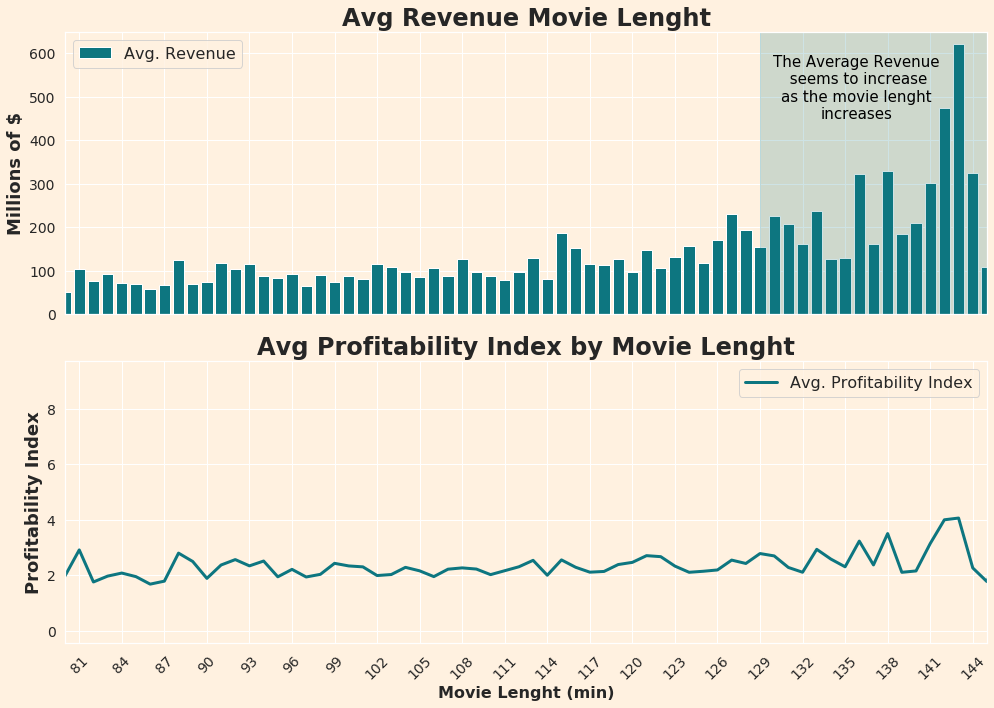

In [0]:
# Final Graph = Revenue and Profitability index by Movie Lenght
 
color = 'FFF1E0'
sns.set(rc={'axes.facecolor':color, 'figure.facecolor':color}) #same as before 
fig, ax = plt.subplots(2, 1, figsize = (14, 10), sharex = True)
plt.xticks(range(len(list(movie_lenght.index)))[::3], list(movie_lenght.index)[::3], rotation = 45, fontsize = 12)
plt.xlabel('Movie Lenght (min)', fontsize = 16, fontweight = 'bold') 

# Set the first bar plot

ax[0].set_title('Avg Revenue Movie Lenght', fontsize = 24, fontweight = 'bold')
ax[0].bar(range(len(list(movie_lenght.index))), list(movie_lenght["avg_revenue"]), align='center', color = '#0D7680', lw = 1, label = 'Avg. Revenue', width = 0.8,)
ax[0].set_ylabel('Millions of $', fontsize = 18,fontweight = 'bold')
ax[0].legend(fontsize = 16)
ax[0].set_xlim([11,76])   # set the xlim
ax[0].set_ylim([0,650])   # set the ylim
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].axvspan(60, 76, color='#0D7680', alpha=0.2)
ax[0].text(66.8, 450, 'The Average Revenue\n seems to increase\nas the movie lenght\nincreases', fontdict={'color':'black', 'fontsize':15}, ha='center')

# Set the second line graph:

ax[1].set_title('Avg Profitability Index by Movie Lenght', fontsize = 24, fontweight = 'bold')
ax[1].plot(range(len(list(movie_lenght.index))), list(movie_lenght["avg_profitability_index"]), color = '#0D7680', lw = 3, label = 'Avg. Profitability Index')
ax[1].set_ylabel('Profitability Index', fontsize = 18, fontweight = 'bold')
ax[1].legend(fontsize = 16)
ax[1].set_xlim([11,76])   # set the xlim
ax[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()

**Findings:**

Regarding the year of release, there is a slighly positive trend of increase in revenues over the years. Althought this trend is not considered to be any relevant, it is possible to observe some periods of downturns (e.g.2009). Regarding the profitability index by year of release, a similar conclusion can be drawn: there is **no relevant variation between the years**.

In terms of the analysis by lenght of the movie the conclusions are similar, but seem a bit more insightful. Although is not strong there is an increase in average revenue that can be noted over the increase in leght of the movie. It can also be seen a slighly increasing trend in the profitability index, leaving the impression that **longer movies might be more interesting in a financial perspective**. 

Nevertheless, after the analysis on "movie characteristics" no major conclusions could be drawn from the data, and further analysis would be necessary.


# *5. Companies*
* After noticing that, although the trend of revenues is in a growing path, average profitability is not suffering substantial differences, it is interesting to know **what are the companies that produce the most lucrative movies** to get some level of differentiation and, therefore, a more trusty tip to follow when considering to invest in this Industry.
To do that, among the 50 companies that have produced a higher amount of movies until now, the question is: **what are the top 20 Movie Producers in terms of profitability?**


In [0]:
# From 'production_companies', select the producer of each movie and form a new column :

for_profit = master_df.reset_index(drop=True)

for_profit['producer_as_list'] = np.nan
for_profit['producer_as_string']= np.nan

for i in range(master_df.shape[0]):
    l = eval((for_profit['production_companies'][i]))
    lista = [d['name'] for d in l]
    for_profit['producer_as_list'][i] = lista
    for_profit['producer_as_string'][i] = ', '.join(lista)
                                    
for_profit.head(2)

,movieId,tmdbId,title,genres,original_language,release_date,runtime,cast,production_companies,production_countries,popularity,vote_average,vote_count,revenue,budget,revenue_adjusted,budget_adjusted,profitability_index,producer_as_list,producer_as_string
0,10,710.0,GoldenEye (1995),Action|Adventure|Thriller,en,1995-11-16,130.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",59.824565,6.6,1174,352.194034,58.0,563.510454,92.8,6.072311,"[United Artists, Eon Productions]","United Artists, Eon Productions"
1,11,9087.0,"American President, The (1995)",Comedy|Drama|Romance,en,1995-11-17,106.0,"[{""cast_id"": 1, ""character"": ""Andrew Shepherd""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11.056763,6.5,195,107.879496,62.0,172.607194,99.2,1.739992,"[Columbia Pictures, Castle Rock Entertainment]","Columbia Pictures, Castle Rock Entertainment"


In [0]:
# Count the number of times each producer executed a movie :

producers = []

for i in range(for_profit.shape[0]):
    producers.append(for_profit['producer_as_list'][i])

flatten = pd.Series([item for sublist in producers for item in sublist])

producers = flatten.groupby(flatten).size().rename_axis('producer').reset_index(name='count').sort_values(by='count', ascending=False).reset_index(drop=True)

# Make the parenthesis be seen as parenthesis in the loop below 
producers['producer'] = producers['producer'].apply(lambda x: x.translate(str.maketrans({"(": r"\(", ")": r"\)"})))

producers.head()

,producer,count
0,Warner Bros.,271
1,Universal Pictures,247
2,Paramount Pictures,232
3,Twentieth Century Fox Film Corporation,179
4,Columbia Pictures,168


In [0]:
# Calculate the average Profitability Index of the top 20 producers:

producers['PI_mean'] = np.nan
PI = []

for name in producers['producer']:
    PI.append(for_profit.loc[for_profit['producer_as_string'].str.contains(name)]['profitability_index'].mean())

for i in range(producers.shape[0]):
    producers['PI_mean'][i] = PI[i]

In [0]:
# From the 50 producers with most movies produced, choose the top 20 with highest profitability

top50_producers_count = producers.sort_values(by='count', ascending = False)[:50]
top20_producers_sorted_PI = top50_producers_count.sort_values(by='PI_mean', ascending = False)[:20]
top20_producers_sorted_PI

,producer,count,PI_mean
24,Amblin Entertainment,40,4.025958
18,United Artists,49,3.651050
34,DreamWorks Animation,30,3.629803
23,Working Title Films,40,3.159920
3,Twentieth Century Fox Film Corporation,179,3.110420
16,Dune Entertainment,52,3.085213
33,Scott Rudin Productions,31,2.992502
30,The Weinstein Company,33,2.964581
13,DreamWorks SKG,67,2.928987
19,Fox Searchlight Pictures,47,2.914085


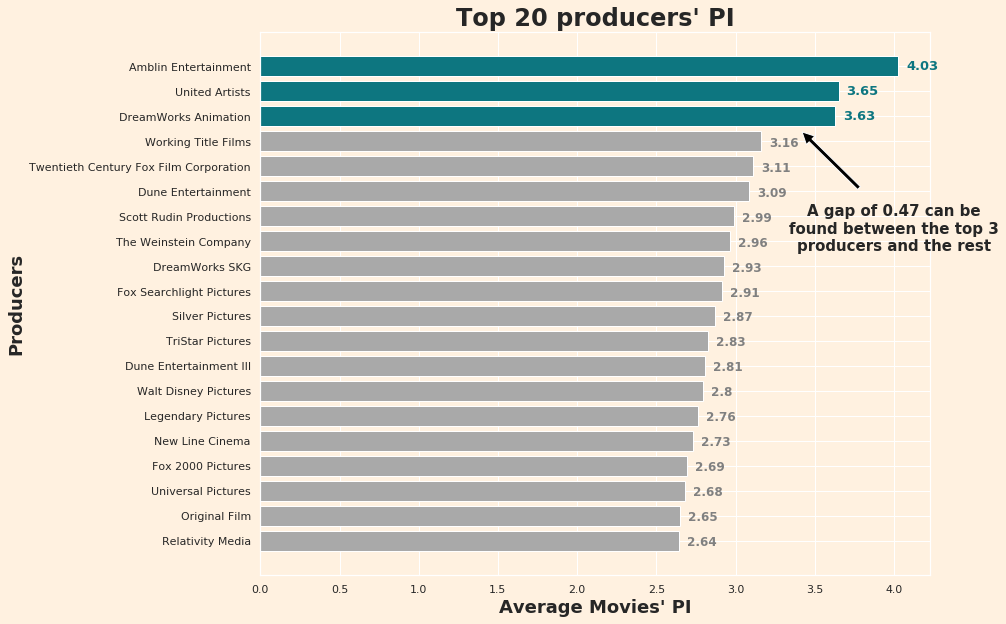

In [0]:
# Visualization of the top 20 producer companies and corresponding movies' average PI:

colors = ['darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray', '#0D7680', '#0D7680', '#0D7680']

fig = plt.figure(figsize=[12,10])

plt.barh(y='producer', width='PI_mean', color=colors, data=top20_producers_sorted_PI[::-1])
plt.xlabel("Average Movies' PI", fontsize = 18, fontweight = 'bold')
plt.ylabel('Producers', fontsize = 18, fontweight = 'bold')
plt.title("Top 20 producers' PI", fontsize = 24, fontweight = 'bold')
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

label_values1 = list(top20_producers_sorted_PI['PI_mean'].values)
label_values1.reverse()

for i, v in enumerate(label_values1[:-3]):
  plt.text(v + 0.05, i -0.2, str(round(v,2)), color='grey', fontsize = 12, fontweight='bold')

for i, u in enumerate(top20_producers_sorted_PI['PI_mean'][:3]):
    plt.text(u + 0.05, 19 - i, str(round(u,2)), color='#0D7680', fontsize = 13, va='center', fontweight='bold')
    
plt.annotate('A gap of 0.47 can be\nfound between the top 3\nproducers and the rest', xy=(4,12.5), xytext=(4,12.5), ha='center', va='center', fontsize=15, fontweight='bold')
plt.annotate('', xy=(3.4, 16.5), xytext=(3.8,14), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

**Findings:**<br>
From the previous chart it can be seen that the three **companies with higher profitability index per movie are Amblin, United Artists and DreamWorks**. Amblin is the producer from the famous Steven Spielberg , and is recognised for several known movies as Jurassic Park, E.T., Cats, among others.

Since the Revenues in this dataset do not represent the revenues of each individual company but the box office revenues, this analysis represents the impact that each producer has in the overall movie industry. According to Investopedia, "(...) a studio might make about 60% of a film's ticket sales in the U.S., and around 20% to 40% of that on overseas ticket sales." which would decrease the actual revenue made by each producer. Nevertheless, the analysis seems to give an interesting insight on the industry and the ranking.

Link: https://www.investopedia.com/articles/investing/093015/how-exactly-do-movies-make-money.asp

# *6. Actors*
Following the question regarding top producers, the available datasets gave the group the opportunity to study the presence of a trend in terms of profitability and famous actors in the cast. Therefore, an analysis was performed in order to understand **who are the actors you should count with, when you decide to produce a movie**. 

In [0]:
# From 'cast', select the 3 main characters of each movie and form a new column (assumming they are by order):

for_profit['actor_as_list'] = np.nan
for_profit['actor_as_string']= np.nan

for i in range(for_profit.shape[0]):
    l = eval((for_profit['cast'][i]))
    lista = [d['name'] for d in l]
    for_profit['actor_as_list'][i] = lista[:3]
    for_profit['actor_as_string'][i] = ', '.join(lista[:3])

for_profit.head(2)

,movieId,tmdbId,title,genres,original_language,release_date,runtime,cast,production_companies,production_countries,popularity,vote_average,vote_count,revenue,budget,revenue_adjusted,budget_adjusted,profitability_index,producer_as_list,producer_as_string,actor_as_list,actor_as_string
0,10,710.0,GoldenEye (1995),Action|Adventure|Thriller,en,1995-11-16,130.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",59.824565,6.6,1174,352.194034,58.0,563.510454,92.8,6.072311,"[United Artists, Eon Productions]","United Artists, Eon Productions","[Pierce Brosnan, Sean Bean, Izabella Scorupco]","Pierce Brosnan, Sean Bean, Izabella Scorupco"
1,11,9087.0,"American President, The (1995)",Comedy|Drama|Romance,en,1995-11-17,106.0,"[{""cast_id"": 1, ""character"": ""Andrew Shepherd""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11.056763,6.5,195,107.879496,62.0,172.607194,99.2,1.739992,"[Columbia Pictures, Castle Rock Entertainment]","Columbia Pictures, Castle Rock Entertainment","[Michael Douglas, Annette Bening, Michael J. Fox]","Michael Douglas, Annette Bening, Michael J. Fox"


In [0]:

# Count the number of times each actor participated in a movie as one of the 3 main characters:

actors = []

for i in range(for_profit.shape[0]):
    actors.append(for_profit['actor_as_list'][i])

flatten = pd.Series([item for sublist in actors for item in sublist])

actors = flatten.groupby(flatten).size().rename_axis('actor').reset_index(name='count').sort_values(by='count', ascending=False).reset_index(drop=True)
actors.head()

,actor,count
0,Robert De Niro,37
1,Bruce Willis,33
2,Nicolas Cage,33
3,Matt Damon,32
4,Johnny Depp,29


In [0]:
# Calculate the average Profitability Index of the movies of the 200 most famous actors (who have participated in more movies):

actors['PI_mean'] = np.nan
PI = []

for name in actors['actor']:
    PI.append(for_profit.loc[for_profit['actor_as_string'].str.contains(name)]['profitability_index'].mean())

for i in range(actors.shape[0]):    
    actors['PI_mean'][i] = PI[i]

famous_actors = actors.sort_values(["count"], ascending=False)[:200]
famous_actors.head()

,actor,count,PI_mean
0,Robert De Niro,37,2.345097
2,Nicolas Cage,33,1.607569
1,Bruce Willis,33,1.959780
3,Matt Damon,32,2.441371
4,Johnny Depp,29,2.430573


In [0]:
# Within the most famous actors, identification of the 20 most profitable ones:

top_actors = famous_actors.sort_values(["PI_mean"], ascending=False)[:20]
top_actors

,actor,count,PI_mean
164,John Leguizamo,11,4.717323
176,Emma Stone,10,4.567409
165,Woody Allen,11,4.478358
119,Ryan Reynolds,12,4.365308
11,Tom Hanks,24,4.203337
139,Clint Eastwood,12,4.084713
69,Anne Hathaway,16,4.012204
197,Rachel McAdams,10,3.883268
188,Ian McKellen,10,3.817707
56,Will Smith,17,3.625635


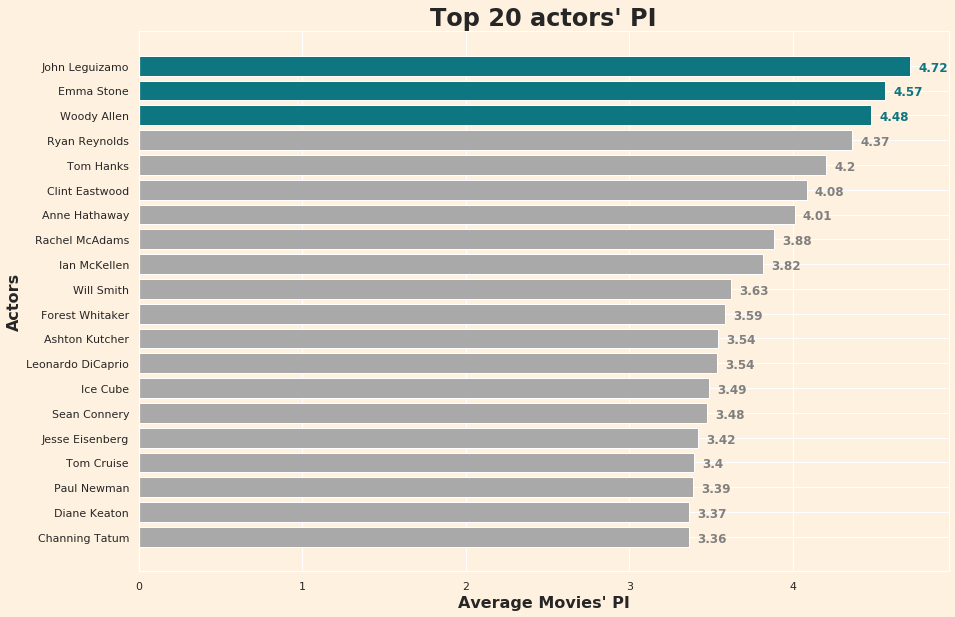

In [0]:
# Visualization of the top 20 actors and corresponding movies' average PI:

color = 'FFF1E0'
sns.set(rc={'axes.facecolor':color, 'figure.facecolor':color})

colors = ['darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray','darkgray', '#0D7680', '#0D7680', '#0D7680']

plt.barh(y='actor', width='PI_mean', color=colors, data=top_actors[::-1])
plt.subplots_adjust(top=2, right=2)
plt.xlabel("Average Movies' PI", fontsize = 16, fontweight = 'bold')
plt.ylabel('Actors', fontsize = 16, fontweight = 'bold')
plt.title("Top 20 actors' PI", fontsize = 24, fontweight = 'bold')

label_values = list(top_actors['PI_mean'].values)
label_values.reverse()

for i, v in enumerate(label_values[:-3]):
  plt.text(v + 0.05, i -0.2, str(round(v,2)), color='grey', fontsize = 12, fontweight='bold')

for a, b in enumerate(top_actors['PI_mean'][:3]):
  plt.text(b + 0.05, 18.8 - a, str(round(b,2)), color='#0D7680', fontsize = 12, fontweight='bold');

**Findings:**<br>
Regarding top actors in the Entertainment Industry, the group noticed that **John Leguizamo, Emma Stone and Woody Allen are the ones to call if a Producer wants to get high profits**. This means that, among the most famous actors, these 3 are the ones who have participated, on average, in the most profitable movies of all times (regarding the movies under analysis on our dataset). 


# *7. Conclusions*

After curating the data, removing outliers, adapting values to inflation, the team started to create some hypothesis about the **most crucial variables to increase the probability** of producing a profitable movie.

By starting with genre, which is the main characteristic that differentiates a movie from another, it was interesting to see that revenues follow the profitability index growth, culminating in the **Animation and Adventure** genres. Noticing some relationship between profits and revenues, the group decided to evaluate their correlation to the average votes, that turned out to be positive (**higher rating on TMDB tend to convert into higher profits**). This was an expected but powerful insight since to create a high quality movie, the producer should try to please their audience in the first place.

Then, the matter of the evolution through the years, not only in terms of the amount of movies produced, but also their profitability, became relevant. It is noticeable that the **number of produced movies has been growing**, with a high increase in the 90's. On the other hand, the **profitability trends in the Entertainment Industry does not seem to change significantly through the years**, althrough it has several highs and lows, as everywhere. This means that producers have been adapting to the world changes, not letting to be replaced by other industries.

To have a more comprehensive analysis, the group tried to understand which are the producers that tend to have a higher profitability index on their movies, as well as the actors that tend to be in the most profitable movies. In terms of producers, **Amblin, United Artists and DreamWorks** seem to be the ones with higher margins, and when it comes to actors **John Leguizamo, Emma Stone and Woody Allen** seem to be the ones that are more often present in the most profitable movies.

![image](https://drive.google.com/uc?id=1oK1RgcX0TYZdtrdQqoLYGzy1_IrxHRjO)




# *8. Sources*

https://deadline.com/2018/07/film-industry-revenue-2017-ibisworld-report-gloomy-box-office-1202425692/

https://www.latimes.com/entertainment/envelope/cotownla-et-ct-documentaries-big-audiences-the-jinx-20150319-story.html

https://www.investopedia.com/articles/investing/093015/how-exactly-do-movies-make-money.asp